In [1]:
# -----------------------------------------------------------------------------
# :author:    Juanjuan Huang & Shelly D. Keylly
# :email:     juanjuan.huang@anl.gov
# :copyright: Copyright © 2023, UChicago Argonne, LLC
# -----------------------------------------------------------------------------


# Imports

In [1]:
%matplotlib widget
import neighbor_core as nc
from neighbor_core import ClusterNeighbor
from ipyfilechooser import FileChooser
import numpy as np

# Initialize a cluster and view it

In [3]:
fc = FileChooser()
display(fc)

FileChooser(path='/Users/juanjuanhuang/Desktop/neighbor', filename='', title='', show_hidden=False, select_des…

# view it

In [4]:
cluster = ClusterNeighbor()
if fc.value is not None:
    cluster.load_xyz(path=fc.value)
else:
    cluster.load_xyz(path="structure_examples/198087-ICSD molecule.xyz")
cluster.view_xyz(label=True, show_symbol=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Plot histogram

In [5]:
cluster.get_pairs()
cluster.plot_hist(plot_engine="plotly")

# Get CN reports and save to excel

In [6]:
cluster.get_CN_summary_all(tolerance=0.1, bond_range=5, printit=False)
cluster.print_CN_summary()
cluster.write_to_excel("20240806_test_original.xlsx")

Bond Type: Pb-O
-- Distance: 2.164006661818935
-- Average CN: 5.2
-- Info: 
4 atoms have CN of 3; 
11 atoms have CN of 6; 
-- Tolerance: 0.1 

-- Distance: 3.759464103600722
-- Average CN: 2.4
-- Info: 
12 atoms have CN of 2; 
3 atoms have CN of 4; 
-- Tolerance: 0.1 

-- Distance: 4.0161487745681885
-- Average CN: 2.4
-- Info: 
10 atoms have CN of 2; 
4 atoms have CN of 3; 
1 atoms have CN of 4; 
-- Tolerance: 0.1 

-- Distance: 4.450974934970656
-- Average CN: 4.266666666666667
-- Info: 
14 atoms have CN of 4; 
1 atoms have CN of 8; 
-- Tolerance: 0.1 

-- Distance: 4.861048023898767
-- Average CN: 0.9333333333333333
-- Info: 
4 atoms have CN of 0; 
8 atoms have CN of 1; 
3 atoms have CN of 2; 
-- Tolerance: 0.1 

Bond Type: O-O
-- Distance: 2.707596806026806
-- Average CN: 0.7272727272727273
-- Info: 
12 atoms have CN of 0; 
32 atoms have CN of 1; 
-- Tolerance: 0.1 

-- Distance: 3.056656193800888
-- Average CN: 5.090909090909091
-- Info: 
4 atoms have CN of 2; 
18 atoms have CN of

# remove undercoordinated atoms

In [7]:
cluster.remove_under_coordinated_atoms(center_atom="Pb", CN_atom="O", CN_threshold=7, bond_range=4, self_apply=True)
cluster.view_xyz(label=True, show_symbol=True)

Remove under-coordinated atoms: Atoms(symbols='Pb4', pbc=False)[[22, 37, 57, 58]]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [8]:
cluster.get_CN_summary_all(tolerance=0.1, bond_range=5, printit=False)
cluster.print_CN_summary()
cluster.write_to_excel("20240807_test_reduced.xlsx")

Bond Type: Pb-O
-- Distance: 2.164006684677769
-- Average CN: 6.0
-- Info: 
11 atoms have CN of 6; 
-- Tolerance: 0.1 

-- Distance: 3.7594640623910167
-- Average CN: 2.5454545454545454
-- Info: 
8 atoms have CN of 2; 
3 atoms have CN of 4; 
-- Tolerance: 0.1 

-- Distance: 4.016148722271057
-- Average CN: 2.5454545454545454
-- Info: 
6 atoms have CN of 2; 
4 atoms have CN of 3; 
1 atoms have CN of 4; 
-- Tolerance: 0.1 

-- Distance: 4.450974886404176
-- Average CN: 4.363636363636363
-- Info: 
10 atoms have CN of 4; 
1 atoms have CN of 8; 
-- Tolerance: 0.1 

-- Distance: 4.861047941704461
-- Average CN: 0.9090909090909091
-- Info: 
4 atoms have CN of 0; 
4 atoms have CN of 1; 
3 atoms have CN of 2; 
-- Tolerance: 0.1 

Bond Type: O-O
-- Distance: 2.707596806026806
-- Average CN: 0.7272727272727273
-- Info: 
12 atoms have CN of 0; 
32 atoms have CN of 1; 
-- Tolerance: 0.1 

-- Distance: 3.056656193800888
-- Average CN: 5.090909090909091
-- Info: 
4 atoms have CN of 2; 
18 atoms have 

# Example 2: Polynomial fits of different shells

## select a cif file

In [1]:
%matplotlib widget
import neighbor_core as nc
from neighbor_core import ClusterNeighbor
from ipyfilechooser import FileChooser
import numpy as np

In [2]:
fc = FileChooser()
display(fc)

FileChooser(path='/Users/juanjuanhuang/Desktop/neighbor', filename='', title='', show_hidden=False, select_des…

In [3]:
cif_cluster = ClusterNeighbor()
if fc.value is not None:
    cif_cluster.load_xyz(path=fc.value)
else:
   cif_cluster.load_xyz(path="test_Pt/Ptfoil_243678.cif")
# cif_cluster.view_xyz(label=True, show_symbol=True)

## For multiple shells with undercoordinated atoms removed

In [4]:
center_atom = "Pt"
CN_atom = "Pt"
CN_bond_range = 6
tolerance = 0.1
undercoordinated_threshold = 4

# Initialize dictionaries to store results
CNs_all = {}
bondlengths_all = {}
num_atoms_all = {}
sizes_all = {}

sizes = np.hstack([np.arange(5, 20, 2), np.arange(20, 60, 10)])
sizes = np.hstack([np.arange(5, 20, 5), np.arange(20, 40, 10)])

for i in sizes:
    expanded_cluster = cif_cluster.expand_to_sphere(target_diameter=i, self_apply=False)
    new_cluster = ClusterNeighbor()
    new_cluster.load_xyz(from_file=False, atom_object=expanded_cluster)
    num_atoms = len(new_cluster.atoms)
    new_cluster.atoms.set_pbc(False)

    if 4 < num_atoms < 100:
        new_cluster.remove_under_coordinated_atoms(center_atom=center_atom, 
                                                   CN_atom=CN_atom, 
                                                   CN_threshold=undercoordinated_threshold, 
                                                   bond_range=5, 
                                                   self_apply=True)
    
    new_cluster.get_CN_summary_all(tolerance=tolerance, 
                                   bond_range=CN_bond_range, 
                                   printit=False)
    
    # Get bond lengths for each shell
    bond_lengths = list(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'].keys())
    new_cluster.write_to_excel(f"size_{new_cluster.get_cluster_size():.2f}A")
    # new_cluster.print_CN_summary()
    for shell_index, bond_length in enumerate(bond_lengths):
        shell_key = f'shell_{shell_index + 1}'
        
        # Ensure the key exists in each dictionary
        if shell_key not in CNs_all:
            CNs_all[shell_key] = []
            bondlengths_all[shell_key] = []
            num_atoms_all[shell_key] = []
            sizes_all[shell_key] = []
        
        # Append data to the relevant shell
        bondlengths_all[shell_key].append(bond_length)
        CNs_all[shell_key].append(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'][bond_length]['average_CN'])
        sizes_all[shell_key].append(new_cluster.get_cluster_size())
        num_atoms_all[shell_key].append(num_atoms)
    
    print(f"Processed size: {new_cluster.get_cluster_size()} A with {len(bond_lengths)} shells")
    # print(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'])
    # new_cluster.view_xyz(label=False)


Processed size: 2.774093039679816 A with 1 shells
No under-coordinated atoms found.
Processed size: 8.322279119039449 A with 4 shells
Processed size: 13.870465198399081 A with 4 shells
Processed size: 19.418651277758716 A with 4 shells
Processed size: 29.489013509888732 A with 4 shells


## Polynomial fitting

  Coefficient     Value
0    Constant  0.188264
1         x^1  1.152719
2         x^2 -0.049601
3         x^3  0.000753
--------------------
N1=0.1883+1.1527*d-0.0496*d^2+0.0008*d^3


  Coefficient     Value
0    Constant  1.499385
1         x^1  0.087531
2         x^2  0.006570
3         x^3 -0.000193
--------------------
N1=1.4994+0.0875*d+0.0066*d^2-0.0002*d^3


  Coefficient     Value
0    Constant -8.542970
1         x^1  2.473354
2         x^2 -0.083402
3         x^3  0.001028
--------------------
N1=-8.5430+2.4734*d-0.0834*d^2+0.0010*d^3


  Coefficient     Value
0    Constant -5.944363
1         x^1  1.392915
2         x^2 -0.049939
3         x^3  0.000663
--------------------
N1=-5.9444+1.3929*d-0.0499*d^2+0.0007*d^3




/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_39241/1742136865.py:12: UserWarning: The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x12e653700> starts with '_'. It is thus excluded from the legend.
  plt.legend(legend_labels)
/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_39241/1742136865.py:12: UserWarning: The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x12e623250> starts with '_'. It is thus excluded from the legend.
  plt.legend(legend_labels)
/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_39241/1742136865.py:12: UserWarning: The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x12e6ae3b0> starts with '_'. It is thus excluded from the legend.
  plt.legend(legend_labels)
/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_39241/1742136865.py:12: UserWarning: The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x12e623370> starts with '_'. It is

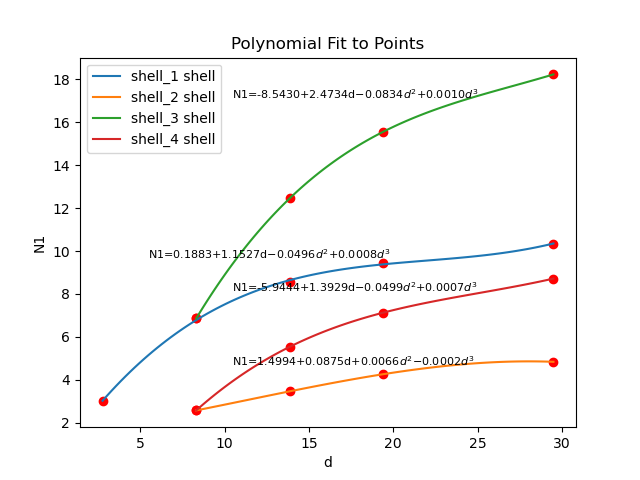

In [5]:
from neighbor_core import fit_polynomial
import matplotlib.pyplot as plt

plt.figure()
for i in range(1, 5):
    shell = f'shell_{i}'
    polynomial = fit_polynomial(np.array(sizes_all[shell]), 
                                np.array(CNs_all[shell]), 
                                degree=3, new_figure=False, xlabel="d", ylabel="N1")

legend_labels = sum([[ '_nolegend', f'{shell} shell'] for shell in CNs_all.keys()], [])
plt.legend(legend_labels)

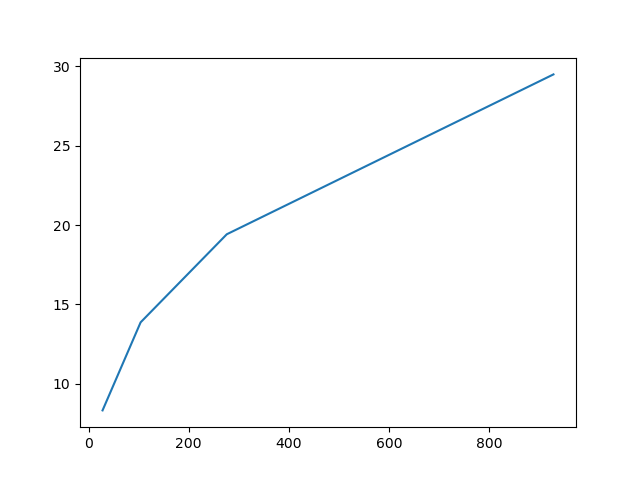

In [6]:
plt.figure()
plt.plot(num_atoms_all[shell], sizes_all[shell])
# for i in range(1, 5):
    # shell = f'shell_{i}'
    # plt.plot(num_atoms_all[shell], sizes_all[shell])

# ASE cluster magic numbers

In [1]:
from ase.cluster import Cluster
from ase.cluster import Icosahedron

# Create a simple cluster with 13 atoms
atoms = Icosahedron('Cu', noshells=3)

view = ClusterNeighbor()
view.load_xyz(from_file=False, atom_object=atoms)
view.view_xyz(label=True, show_symbol=True)


NameError: name 'ClusterNeighbor' is not defined

# Wulff construction examples

In [10]:
from ase.cluster.wulff import wulff_construction
import py3Dmol

# Create a Wulff construction for Cu with specific Miller indices and surface energies
atoms = wulff_construction('Cu', surfaces=[(1, 0, 0), 
                                           (1, 1, 1), 
                                           (1, 1, 0)], 
                           energies=[1.0, 1.0, 1.0], 
                           size=60, 
                           structure='fcc')


view = ClusterNeighbor()
view.load_xyz(from_file=False, atom_object=atoms)
view.view_xyz(label=True, show_symbol=True)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol